### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Total External Debt of all debtors (consolidated)

In [23]:
#dataset
final_df=pd.read_excel(r"E:/Master Thesis/Final/3. Methodology/2. Data Analysis/Data/external_debt_data.xlsx")
final_df

,year,creditor,debtor,indicator,debt
0,2006,WLD,AFG,DT.DOD.DECT.CD,9.793445e+08
1,2007,WLD,AFG,DT.DOD.DECT.CD,2.023035e+09
2,2008,WLD,AFG,DT.DOD.DECT.CD,2.143952e+09
3,2009,WLD,AFG,DT.DOD.DECT.CD,2.480214e+09
4,2010,WLD,AFG,DT.DOD.DECT.CD,2.435845e+09
...,...,...,...,...,...
6399,2019,WLD,ZWE,DT.DOD.DECT.CD,1.224936e+10
6400,2020,WLD,ZWE,DT.DOD.DECT.CD,1.274203e+10
6401,2021,WLD,ZWE,DT.DOD.DECT.CD,1.381758e+10
6402,2022,WLD,ZWE,DT.DOD.DECT.CD,1.382954e+10


In [4]:
#unique countries
print(final_df['debtor'].nunique())
print(final_df['debtor'].unique())

134
['AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'AZE' 'BDI' 'BEN' 'BFA' 'BGD' 'BIH' 'BLR'
 'BLZ' 'BOL' 'BRA' 'BTN' 'BWA' 'CAF' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL'
 'COM' 'CPV' 'CRI' 'DJI' 'DMA' 'DOM' 'DZA' 'EAP' 'ECA' 'ECU' 'EGY' 'ERI'
 'ETH' 'FJI' 'GAB' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GRD' 'GTM' 'GUY' 'HND'
 'HTI' 'IDA' 'IDN' 'IDX' 'IND' 'IRN' 'IRQ' 'JAM' 'JOR' 'KAZ' 'KEN' 'KGZ'
 'KHM' 'LAC' 'LAO' 'LBN' 'LBR' 'LCA' 'LDC' 'LIC' 'LKA' 'LMC' 'LMY' 'LSO'
 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MIC' 'MKD' 'MLI' 'MMR' 'MNA' 'MNE' 'MNG'
 'MOZ' 'MRT' 'MUS' 'MWI' 'NER' 'NGA' 'NIC' 'NPL' 'PAK' 'PER' 'PHL' 'PNG'
 'PRY' 'RWA' 'SAS' 'SDN' 'SEN' 'SLB' 'SLE' 'SLV' 'SOM' 'SRB' 'SSA' 'STP'
 'SUR' 'SWZ' 'SYR' 'TCD' 'TGO' 'THA' 'TJK' 'TKM' 'TLS' 'TON' 'TUN' 'TUR'
 'TZA' 'UGA' 'UKR' 'UMC' 'UZB' 'VCT' 'VNM' 'VUT' 'WSM' 'XKX' 'YEM' 'ZAF'
 'ZMB' 'ZWE']


In [24]:
#removing unwanted records

exclude_countries = ['EAP', 'ECA', 'LDC', 'LIC', 'LMC', 'LMY', 'MIC', 'MNA', 'SAS', 'SSA', 'UMC','LAC']
filtered_df = final_df[~final_df['debtor'].isin(exclude_countries)]
print(filtered_df)

      year creditor debtor       indicator          debt
0     2006      WLD    AFG  DT.DOD.DECT.CD  9.793445e+08
1     2007      WLD    AFG  DT.DOD.DECT.CD  2.023035e+09
2     2008      WLD    AFG  DT.DOD.DECT.CD  2.143952e+09
3     2009      WLD    AFG  DT.DOD.DECT.CD  2.480214e+09
4     2010      WLD    AFG  DT.DOD.DECT.CD  2.435845e+09
...    ...      ...    ...             ...           ...
6399  2019      WLD    ZWE  DT.DOD.DECT.CD  1.224936e+10
6400  2020      WLD    ZWE  DT.DOD.DECT.CD  1.274203e+10
6401  2021      WLD    ZWE  DT.DOD.DECT.CD  1.381758e+10
6402  2022      WLD    ZWE  DT.DOD.DECT.CD  1.382954e+10
6403  2023      WLD    ZWE  DT.DOD.DECT.CD  1.421339e+10

[5756 rows x 5 columns]


In [6]:
#unique countries after modifying
print(filtered_df['debtor'].nunique())
print(filtered_df['debtor'].unique())

122
['AFG' 'AGO' 'ALB' 'ARG' 'ARM' 'AZE' 'BDI' 'BEN' 'BFA' 'BGD' 'BIH' 'BLR'
 'BLZ' 'BOL' 'BRA' 'BTN' 'BWA' 'CAF' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL'
 'COM' 'CPV' 'CRI' 'DJI' 'DMA' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ETH' 'FJI'
 'GAB' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GRD' 'GTM' 'GUY' 'HND' 'HTI' 'IDA'
 'IDN' 'IDX' 'IND' 'IRN' 'IRQ' 'JAM' 'JOR' 'KAZ' 'KEN' 'KGZ' 'KHM' 'LAO'
 'LBN' 'LBR' 'LCA' 'LKA' 'LSO' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MKD' 'MLI'
 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'NER' 'NGA' 'NIC' 'NPL' 'PAK'
 'PER' 'PHL' 'PNG' 'PRY' 'RWA' 'SDN' 'SEN' 'SLB' 'SLE' 'SLV' 'SOM' 'SRB'
 'STP' 'SUR' 'SWZ' 'SYR' 'TCD' 'TGO' 'THA' 'TJK' 'TKM' 'TLS' 'TON' 'TUN'
 'TUR' 'TZA' 'UGA' 'UKR' 'UZB' 'VCT' 'VNM' 'VUT' 'WSM' 'XKX' 'YEM' 'ZAF'
 'ZMB' 'ZWE']


In [25]:
#check for null values
filtered_df.isnull().sum()

year         0
creditor     0
debtor       0
indicator    0
debt         0
dtype: int64

In [26]:
# Identify negative debt values
negative_debt = filtered_df[final_df['debt'] < 0]
print("Negative debt values before replacement:\n", negative_debt)

Negative debt values before replacement:
 Empty DataFrame
Columns: [year, creditor, debtor, indicator, debt]
Index: []


C:\Users\dhevi\AppData\Local\Temp\ipykernel_27608\3007853616.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_debt = filtered_df[final_df['debt'] < 0]


In [8]:
#datatypes of attributes
filtered_df.dtypes

year           int64
creditor      object
debtor        object
indicator     object
debt         float64
dtype: object

In [12]:
# 1. Descriptive Statistics
print("Summary Statistics for Total External Debt:")
print(filtered_df['debt'].describe())


Summary Statistics for Total External Debt:
count    5.756000e+03
mean     2.969323e+10
std      1.190867e+11
min      0.000000e+00
25%      7.160166e+08
50%      3.278559e+09
75%      1.345307e+10
max      2.724354e+12
Name: debt, dtype: float64


    year          debt
0   1970  8.264639e+10
1   1971  9.795492e+10
2   1972  1.134532e+11
3   1973  1.383581e+11
4   1974  1.736190e+11
5   1975  2.104880e+11
6   1976  2.519487e+11
7   1977  3.359447e+11
8   1978  4.124349e+11
9   1979  4.801916e+11
10  1980  5.899846e+11
11  1981  6.897734e+11
12  1982  7.829808e+11
13  1983  8.544196e+11
14  1984  8.928519e+11
15  1985  1.000823e+12
16  1986  1.110761e+12
17  1987  1.291043e+12
18  1988  1.310880e+12
19  1989  1.387048e+12
20  1990  1.516019e+12
21  1991  1.595905e+12
22  1992  1.652066e+12
23  1993  1.767570e+12
24  1994  1.942843e+12
25  1995  2.129755e+12
26  1996  2.169064e+12
27  1997  2.197469e+12
28  1998  2.359668e+12
29  1999  2.389135e+12
30  2000  2.339509e+12
31  2001  2.352179e+12
32  2002  2.435972e+12
33  2003  2.622855e+12
34  2004  2.763126e+12
35  2005  2.671290e+12
36  2006  2.750964e+12
37  2007  3.177317e+12
38  2008  3.422252e+12
39  2009  3.746236e+12
40  2010  4.474245e+12
41  2011  5.154493e+12
42  2012  5

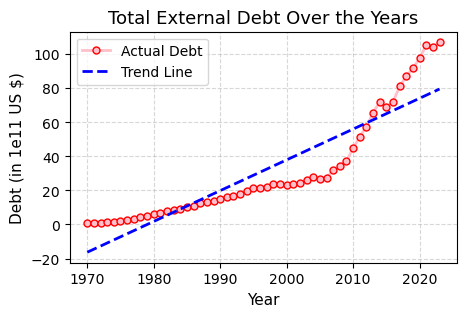

In [26]:
# 2. Total Debt by Year
'''total_debt_year = filtered_df.groupby('year')['debt'].sum().reset_index()
print(total_debt_year.head())
plt.figure(figsize=(10, 6))
plt.plot(total_debt_year['year'], total_debt_year['debt'] / 1e11, marker='o', color='pink')
plt.title('Total External Debt Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Debt (in 1e11 US $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()'''

# Summing debt per year
total_debt_year = filtered_df.groupby('year')['debt'].sum().reset_index()
print(total_debt_year)

# Convert year to numerical values for regression
x = total_debt_year['year']
y = total_debt_year['debt'] / 1e11  # Scale down for readability

# Fit a linear regression (trend line)
trend = np.polyfit(x, y, 1)  # 1st degree polynomial (linear)
trend_line = np.poly1d(trend)

# Plot
plt.figure(figsize=(5, 3))  # Reduced figure size

# Original data
plt.plot(x, y, marker='o', color='pink', linestyle='-', linewidth=2, markersize=5, markeredgecolor='red', label='Actual Debt')

# Trend line
plt.plot(x, trend_line(x), color='blue', linestyle='--', linewidth=2, label='Trend Line')

# Title and labels
plt.title('Total External Debt Over the Years', fontsize=13)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Debt (in 1e11 US $)', fontsize=11)

# Grid customization
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.show()

  Debtor    Total Debt  Average Debt
0    CHN  2.871935e+13  6.678919e+11
1    IDA  1.816902e+13  3.364632e+11
2    BRA  1.262840e+13  2.338593e+11
3    MEX  1.214416e+13  2.248919e+11
4    IDX  1.203662e+13  2.229004e+11
5    IND  9.845809e+12  1.823298e+11
6    TUR  8.723236e+12  1.615414e+11
7    IDN  7.680447e+12  1.422305e+11
8    ARG  5.975625e+12  1.106597e+11
9    THA  3.800357e+12  7.037698e+10


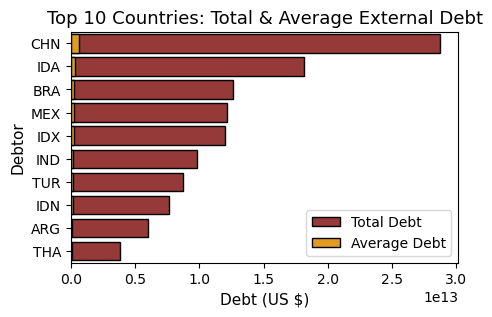

In [29]:
# 3. Calculate total and average debt per country of top 10 countries
top_countries = (
    filtered_df.groupby('debtor')['debt']
    .agg(['sum', 'mean'])  # Get both total and average debt
    .sort_values(by='sum', ascending=False)
    .head(10)  # Show only top 5
    .reset_index()
)

# Rename columns for clarity
top_countries.columns = ['Debtor', 'Total Debt', 'Average Debt']

# Print total and average debt
print(top_countries)

# Plot
plt.figure(figsize=(5, 3))  # Adjusted for better readability

# Create side-by-side bar plots for total and average debt
ax = sns.barplot(x='Total Debt', y='Debtor', data=top_countries, color='brown', label='Total Debt', edgecolor='black')
sns.barplot(x='Average Debt', y='Debtor', data=top_countries, color='orange', label='Average Debt', edgecolor='black')

# Add labels
plt.title('Top 10 Countries: Total & Average External Debt', fontsize=13)
plt.xlabel('Debt (US $)', fontsize=11)
plt.ylabel('Debtor', fontsize=11)
plt.legend()

# Show the plot
plt.show()

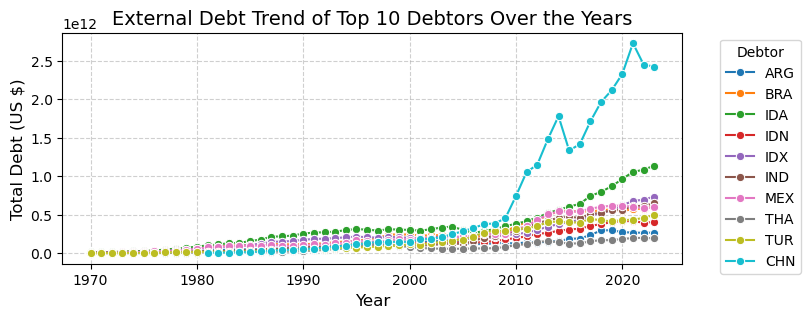

In [30]:
# top 10 countries graph

# Step 1: Get the top 10 countries with the highest total debt
top_10_countries = (
    filtered_df.groupby('debtor')['debt']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index  # Get country names
)

# Step 2: Filter data for only the top 10 countries
top_10_df = filtered_df[filtered_df['debtor'].isin(top_10_countries)]

# Step 3: Aggregate debt by year and country
debt_trend = top_10_df.groupby(['year', 'debtor'])['debt'].sum().reset_index()

# Step 4: Plot
plt.figure(figsize=(8, 3))  # Adjust figure size for readability

sns.lineplot(x='year', y='debt', hue='debtor', data=debt_trend, marker='o', palette='tab10')

# Titles and labels
plt.title('External Debt Trend of Top 10 Debtors Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Debt (US $)', fontsize=12)
plt.legend(title='Debtor', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

### 2. Debt amount of India corresponding to all indicators

In [43]:
#dataset
final_df=pd.read_excel(r"E:/Master Thesis/Final/3. Methodology/2. Data Analysis/Data/IND_consolidated_data.xlsx")
final_df

,year,creditor,debtor,indicator,debt
0,1975.0,WLD,IND,BM.GSR.TOTL.CD,6.394627e+09
1,1976.0,WLD,IND,BM.GSR.TOTL.CD,6.118738e+09
2,1977.0,WLD,IND,BM.GSR.TOTL.CD,7.027715e+09
3,1978.0,WLD,IND,BM.GSR.TOTL.CD,9.449308e+09
4,1979.0,WLD,IND,BM.GSR.TOTL.CD,1.242322e+10
...,...,...,...,...,...
21810,2019.0,WLD,IND,DT.TDS.BLAT.PS.CD,3.111778e+09
21811,2020.0,WLD,IND,DT.TDS.BLAT.PS.CD,2.155195e+09
21812,2021.0,WLD,IND,DT.TDS.BLAT.PS.CD,2.224667e+09
21813,2022.0,WLD,IND,DT.TDS.BLAT.PS.CD,1.928855e+09


In [44]:
#unique countries after modifying
print(final_df['indicator'].nunique())
print(final_df['indicator'].unique())

450
['BM.GSR.TOTL.CD' 'BN.CAB.XOKA.CD' 'BX.GRT.EXTA.CD.DT' 'BX.GRT.TECH.CD.DT'
 'BX.GSR.TOTL.CD' 'BX.KLT.DINV.CD.DT' 'BX.KLT.DREM.CD.DT'
 'BX.PEF.TOTL.CD.DT' 'BX.TRF.PWKR.CD.DT' 'DT.AMT.BLAT.CD' nan
 'DT.AMT.BLAT.GG.CD' 'DT.AMT.BLAT.OPS.CD' 'DT.AMT.BLAT.PRVG.CD'
 'DT.AMT.BLAT.PS.CD' 'DT.AMT.BLTC.CD' 'DT.AMT.BLTC.GG.CD'
 'DT.AMT.BLTC.OPS.CD' 'DT.AMT.BLTC.PRVG.CD' 'DT.AMT.BLTC.PS.CD'
 'DT.AMT.DECB.CD' 'DT.AMT.DEGG.CD' 'DT.AMT.DEPS.CD' 'DT.AMT.DIMF.CD'
 'DT.AMT.DLTF.CD' 'DT.AMT.DLXF.CD' 'DT.AMT.DOPS.CD' 'DT.AMT.DPNG.CD'
 'DT.AMT.DPPG.CD' 'DT.AMT.MIBR.CD' 'DT.AMT.MIDA.CD' 'DT.AMT.MLAT.CD'
 'DT.AMT.MLAT.GG.CD' 'DT.AMT.MLAT.OPS.CD' 'DT.AMT.MLAT.PRVG.CD'
 'DT.AMT.MLAT.PS.CD' 'DT.AMT.MLTC.CD' 'DT.AMT.MLTC.GG.CD'
 'DT.AMT.MLTC.OPS.CD' 'DT.AMT.MLTC.PS.CD' 'DT.AMT.OFFT.CD'
 'DT.AMT.OFFT.GG.CD' 'DT.AMT.OFFT.OPS.CD' 'DT.AMT.OFFT.PRVG.CD'
 'DT.AMT.OFFT.PS.CD' 'DT.AMT.PBND.CD' 'DT.AMT.PBND.GG.CD'
 'DT.AMT.PBND.OPS.CD' 'DT.AMT.PBND.PRVG.CD' 'DT.AMT.PBND.PS.CD'
 'DT.AMT.PCBK.CB.CD' 'DT.AMT.PCBK.CD' 'DT

In [45]:
#check for null values
final_df.isnull().sum()

year         662
creditor     662
debtor       662
indicator    662
debt         662
dtype: int64

In [46]:
final_df = final_df.dropna()
final_df.isnull().sum()

year         0
creditor     0
debtor       0
indicator    0
debt         0
dtype: int64

In [47]:
final_df

,year,creditor,debtor,indicator,debt
0,1975.0,WLD,IND,BM.GSR.TOTL.CD,6.394627e+09
1,1976.0,WLD,IND,BM.GSR.TOTL.CD,6.118738e+09
2,1977.0,WLD,IND,BM.GSR.TOTL.CD,7.027715e+09
3,1978.0,WLD,IND,BM.GSR.TOTL.CD,9.449308e+09
4,1979.0,WLD,IND,BM.GSR.TOTL.CD,1.242322e+10
...,...,...,...,...,...
21810,2019.0,WLD,IND,DT.TDS.BLAT.PS.CD,3.111778e+09
21811,2020.0,WLD,IND,DT.TDS.BLAT.PS.CD,2.155195e+09
21812,2021.0,WLD,IND,DT.TDS.BLAT.PS.CD,2.224667e+09
21813,2022.0,WLD,IND,DT.TDS.BLAT.PS.CD,1.928855e+09


In [48]:
#unique countries after modifying
print(final_df['indicator'].nunique())
print(final_df['indicator'].unique())

450
['BM.GSR.TOTL.CD' 'BN.CAB.XOKA.CD' 'BX.GRT.EXTA.CD.DT' 'BX.GRT.TECH.CD.DT'
 'BX.GSR.TOTL.CD' 'BX.KLT.DINV.CD.DT' 'BX.KLT.DREM.CD.DT'
 'BX.PEF.TOTL.CD.DT' 'BX.TRF.PWKR.CD.DT' 'DT.AMT.BLAT.CD'
 'DT.AMT.BLAT.GG.CD' 'DT.AMT.BLAT.OPS.CD' 'DT.AMT.BLAT.PRVG.CD'
 'DT.AMT.BLAT.PS.CD' 'DT.AMT.BLTC.CD' 'DT.AMT.BLTC.GG.CD'
 'DT.AMT.BLTC.OPS.CD' 'DT.AMT.BLTC.PRVG.CD' 'DT.AMT.BLTC.PS.CD'
 'DT.AMT.DECB.CD' 'DT.AMT.DEGG.CD' 'DT.AMT.DEPS.CD' 'DT.AMT.DIMF.CD'
 'DT.AMT.DLTF.CD' 'DT.AMT.DLXF.CD' 'DT.AMT.DOPS.CD' 'DT.AMT.DPNG.CD'
 'DT.AMT.DPPG.CD' 'DT.AMT.MIBR.CD' 'DT.AMT.MIDA.CD' 'DT.AMT.MLAT.CD'
 'DT.AMT.MLAT.GG.CD' 'DT.AMT.MLAT.OPS.CD' 'DT.AMT.MLAT.PRVG.CD'
 'DT.AMT.MLAT.PS.CD' 'DT.AMT.MLTC.CD' 'DT.AMT.MLTC.GG.CD'
 'DT.AMT.MLTC.OPS.CD' 'DT.AMT.MLTC.PS.CD' 'DT.AMT.OFFT.CD'
 'DT.AMT.OFFT.GG.CD' 'DT.AMT.OFFT.OPS.CD' 'DT.AMT.OFFT.PRVG.CD'
 'DT.AMT.OFFT.PS.CD' 'DT.AMT.PBND.CD' 'DT.AMT.PBND.GG.CD'
 'DT.AMT.PBND.OPS.CD' 'DT.AMT.PBND.PRVG.CD' 'DT.AMT.PBND.PS.CD'
 'DT.AMT.PCBK.CB.CD' 'DT.AMT.PCBK.CD' 'DT.AMT

In [49]:
# Identify negative debt values
negative_debt = final_df[final_df['debt'] < 0]

# Print negative debt values
print("Negative debt values before replacement:\n", negative_debt)

# Convert negative debt values to positive
final_df['debt'] = final_df['debt'].abs()

# Verify if all negative values are replaced
negative_debt = final_df[final_df['debt'] < 0]
print("Negative debt values after replacement:\n", negative_debt)

Negative debt values before replacement:
          year creditor debtor          indicator          debt
49     1975.0      WLD    IND     BN.CAB.XOKA.CD -1.475168e+08
54     1980.0      WLD    IND     BN.CAB.XOKA.CD -1.785126e+09
55     1981.0      WLD    IND     BN.CAB.XOKA.CD -2.698332e+09
56     1982.0      WLD    IND     BN.CAB.XOKA.CD -2.523544e+09
57     1983.0      WLD    IND     BN.CAB.XOKA.CD -1.936942e+09
...       ...      ...    ...                ...           ...
21514  2005.0      WLD    IND  DT.NTR.PRVT.PS.CD -8.903387e+09
21525  2016.0      WLD    IND  DT.NTR.PRVT.PS.CD -1.210045e+10
21527  2018.0      WLD    IND  DT.NTR.PRVT.PS.CD -6.698031e+09
21529  2020.0      WLD    IND  DT.NTR.PRVT.PS.CD -1.132629e+10
21531  2022.0      WLD    IND  DT.NTR.PRVT.PS.CD -3.523844e+09

[2387 rows x 5 columns]
Negative debt values before replacement:
 Empty DataFrame
Columns: [year, creditor, debtor, indicator, debt]
Index: []


C:\Users\dhevi\AppData\Local\Temp\ipykernel_27608\3528598404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['debt'] = final_df['debt'].abs()


In [69]:
# 1. Top 5 Indicators
# Group by indicator and sum the debt
debt_by_indicator = final_df.groupby('indicator')['debt'].sum().reset_index()

# Sort by debt in descending order and get the top 10 indicators
highest_5_indicators = debt_by_indicator.sort_values(by='debt', ascending=False).head(5)

# Print the result
print("Top 5 Indicators by Total Debt:")
print(highest_5_indicators)

Top 5 Indicators by Total Debt:
          indicator          debt
0    BM.GSR.TOTL.CD  1.180335e+13
169  DT.DOD.DECT.CD  9.845809e+12
4    BX.GSR.TOTL.CD  9.717743e+12
178  DT.DOD.DLXF.CD  8.002378e+12
234  DT.DOD.VTOT.CD  5.486972e+12


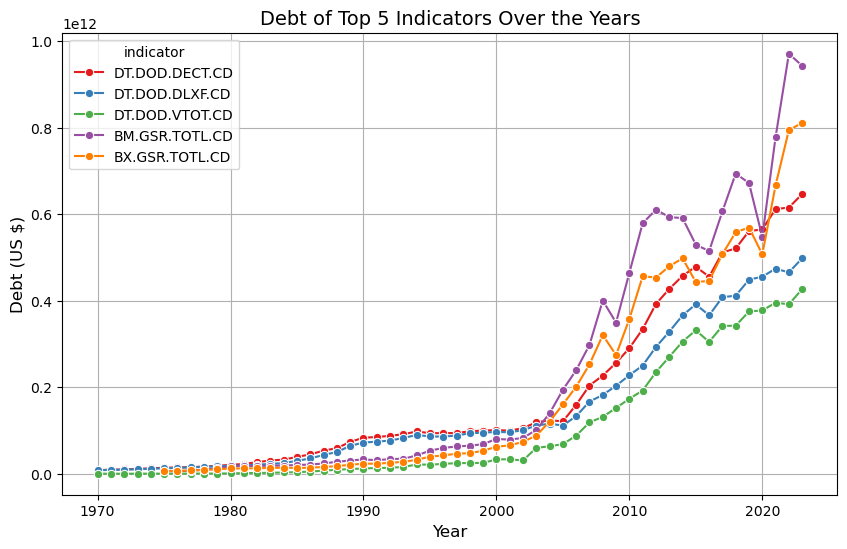

In [67]:
# Group by indicator and sum the debt
debt_by_indicator = final_df.groupby('indicator')['debt'].sum().reset_index()

# Sort the indicators by total debt in descending order and get the top 5
top_5_indicators = debt_by_indicator.sort_values(by='debt', ascending=False).head(5)

# Filter the original data to include only the top 5 indicators
top_5_data = final_df[final_df['indicator'].isin(top_5_indicators['indicator'])]

# Group by year and indicator, then sum the debt
debt_by_year_top_5 = top_5_data.groupby(['year', 'indicator'])['debt'].sum().reset_index()

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a line plot for the top 5 indicators over the years
sns.lineplot(data=debt_by_year_top_5, x='year', y='debt', hue='indicator', marker='o', palette='Set1')

# Title and labels
plt.title('Debt of Top 5 Indicators Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Debt (US $)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()





In [76]:
# 2. debt each year

# Group by year and sum the total debt
total_debt_per_year = final_df.groupby('year')['debt'].sum().reset_index()

# Print the result
print(total_debt_per_year)

      year          debt
0   1970.0  1.945384e+11
1   1971.0  1.625969e+11
2   1972.0  1.708891e+11
3   1973.0  1.916430e+11
4   1974.0  2.265869e+11
5   1975.0  2.682733e+11
6   1976.0  2.698912e+11
7   1977.0  2.815741e+11
8   1978.0  2.946515e+11
9   1979.0  3.264064e+11
10  1980.0  4.049042e+11
11  1981.0  4.093352e+11
12  1982.0  4.878978e+11
13  1983.0  5.072744e+11
14  1984.0  5.596338e+11
15  1985.0  6.601803e+11
16  1986.0  7.729627e+11
17  1987.0  9.305833e+11
18  1988.0  1.134930e+12
19  1989.0  1.237383e+12
20  1990.0  1.316941e+12
21  1991.0  1.360902e+12
22  1992.0  1.416112e+12
23  1993.0  1.477642e+12
24  1994.0  1.572145e+12
25  1995.0  1.567565e+12
26  1996.0  1.559693e+12
27  1997.0  1.609919e+12
28  1998.0  1.752237e+12
29  1999.0  1.636032e+12
30  2000.0  1.819393e+12
31  2001.0  1.651220e+12
32  2002.0  1.838853e+12
33  2003.0  2.120747e+12
34  2004.0  1.916232e+12
35  2005.0  2.145409e+12
36  2006.0  2.522052e+12
37  2007.0  3.408330e+12
38  2008.0  3.490236e+12


C:\Users\dhevi\AppData\Local\Temp\ipykernel_27608\190087382.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_debt_per_year, x='year', y='debt', palette='coolwarm')


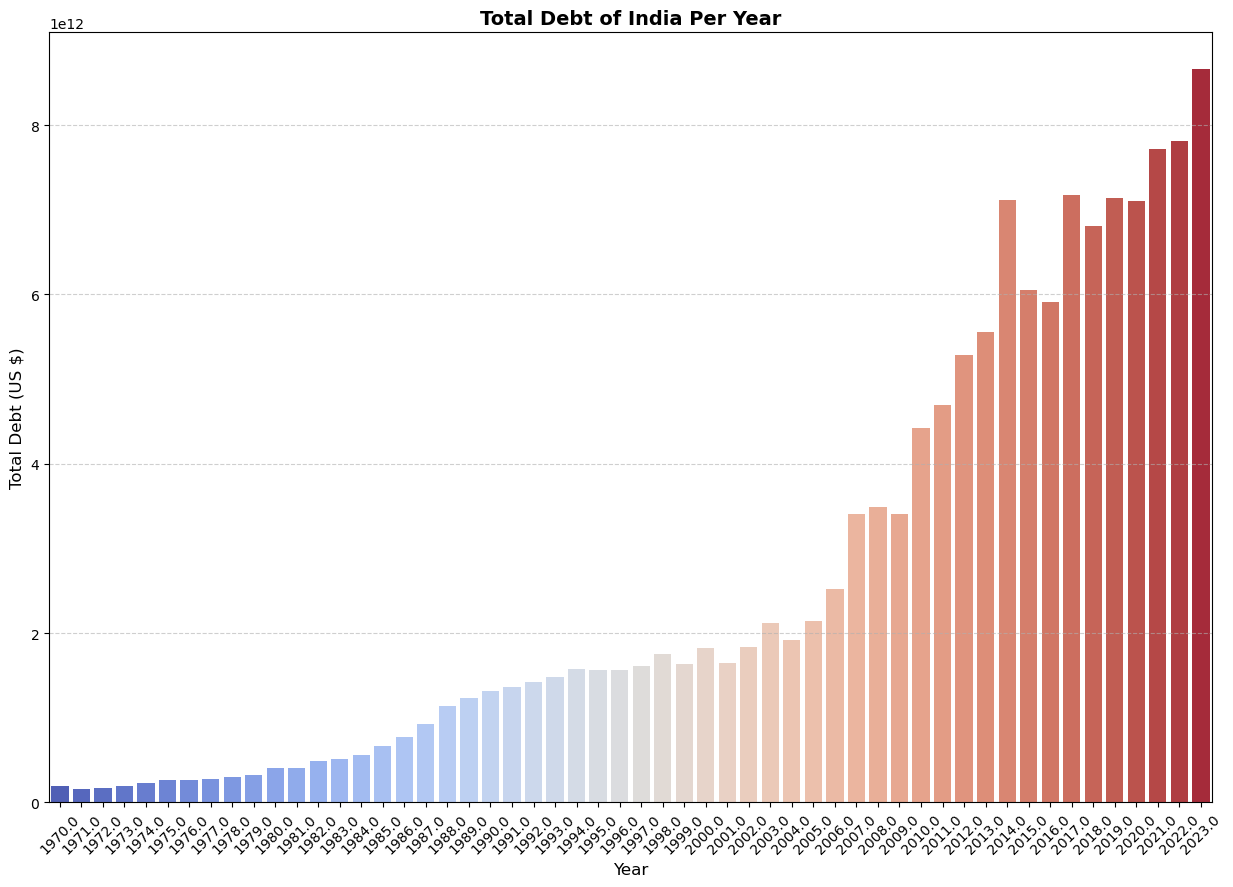

In [88]:
# Group by year and sum total debt
total_debt_per_year = final_df.groupby('year')['debt'].sum().reset_index()

# Set figure size
plt.figure(figsize=(15, 10))

# Create a bar chart with vibrant colors
sns.barplot(data=total_debt_per_year, x='year', y='debt', palette='coolwarm')

# Title and labels
plt.title('Total Debt of India Per Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Debt (US $)', fontsize=12)
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the graph
plt.show()



C:\Users\dhevi\AppData\Local\Temp\ipykernel_27608\1668460411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['decade'] = (final_df['year'] // 10) * 10


   decade          debt
0  1970.0  2.387051e+12
1  1980.0  7.105085e+12
2  1990.0  1.526919e+13
3  2000.0  2.431976e+13
4  2010.0  6.016082e+13
5  2020.0  3.129649e+13


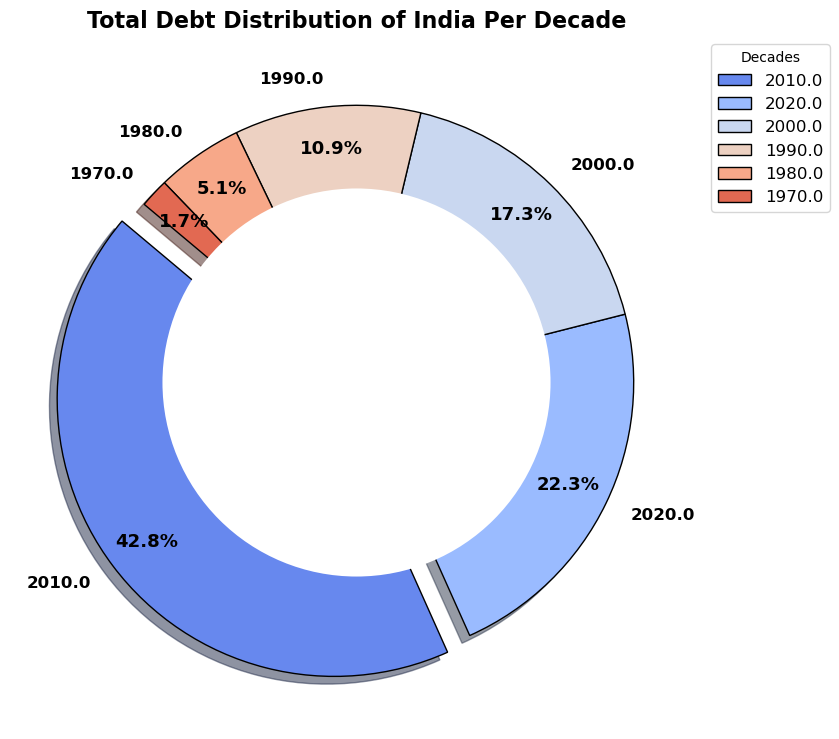

In [79]:
# 3. Debt per decade
# Create a new column for decade (round down to nearest 10)
final_df['decade'] = (final_df['year'] // 10) * 10

# Group by decade and sum the total debt
debt_per_decade = final_df.groupby('decade')['debt'].sum().reset_index()
print(debt_per_decade)
# Sort by debt to highlight the highest decade
debt_per_decade = debt_per_decade.sort_values(by='debt', ascending=False)

# Define a color palette
colors = sns.color_palette("coolwarm", n_colors=len(debt_per_decade))

# Highlight the largest debt decade by "exploding" the slice
explode = [0.1 if i == 0 else 0 for i in range(len(debt_per_decade))]

# Create the pie chart
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(debt_per_decade['debt'], labels=debt_per_decade['decade'], 
                                   autopct='%1.1f%%', startangle=140, colors=colors, 
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'}, 
                                   shadow=True, explode=explode, pctdistance=0.85)

# Improve text appearance
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')
    autotext.set_color('black')

# Draw a circle in the center to create a "donut" effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Title with better font
plt.title('Total Debt Distribution of India Per Decade', fontsize=16, fontweight='bold')

# Add a legend outside the pie chart
plt.legend(title="Decades", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the chart
plt.show()


#### 3. Total External Debt of India

In [89]:
#dataset
final_df=pd.read_excel(r"E:/Master Thesis/Final/3. Methodology/2. Data Analysis/Data/IND.xlsx")
final_df

,year,creditor,debtor,indicator,debt
0,1970,WLD,IND,DT.DOD.DECT.CD,8.425121e+09
1,1971,WLD,IND,DT.DOD.DECT.CD,9.328742e+09
2,1972,WLD,IND,DT.DOD.DECT.CD,1.002927e+10
3,1973,WLD,IND,DT.DOD.DECT.CD,1.096592e+10
4,1974,WLD,IND,DT.DOD.DECT.CD,1.269695e+10
5,1975,WLD,IND,DT.DOD.DECT.CD,1.386561e+10
6,1976,WLD,IND,DT.DOD.DECT.CD,1.458639e+10
7,1977,WLD,IND,DT.DOD.DECT.CD,1.541466e+10
8,1978,WLD,IND,DT.DOD.DECT.CD,1.652025e+10
9,1979,WLD,IND,DT.DOD.DECT.CD,1.819038e+10


In [90]:
#check for null values
final_df.isnull().sum()

year         0
creditor     0
debtor       0
indicator    0
debt         0
dtype: int64

In [91]:
# Identify negative debt values
negative_debt = final_df[final_df['debt'] < 0]

# Print negative debt values
print("Negative debt values before replacement:\n", negative_debt)

Negative debt values before replacement:
 Empty DataFrame
Columns: [year, creditor, debtor, indicator, debt]
Index: []


In [93]:
# Get basic statistics
print(final_df.describe())

              year          debt
count    54.000000  5.400000e+01
mean   1996.500000  1.823298e+11
std      15.732133  1.985432e+11
min    1970.000000  8.425121e+09
25%    1983.250000  3.117811e+10
50%    1996.500000  9.597896e+10
75%    2009.750000  2.818987e+11
max    2023.000000  6.467871e+11


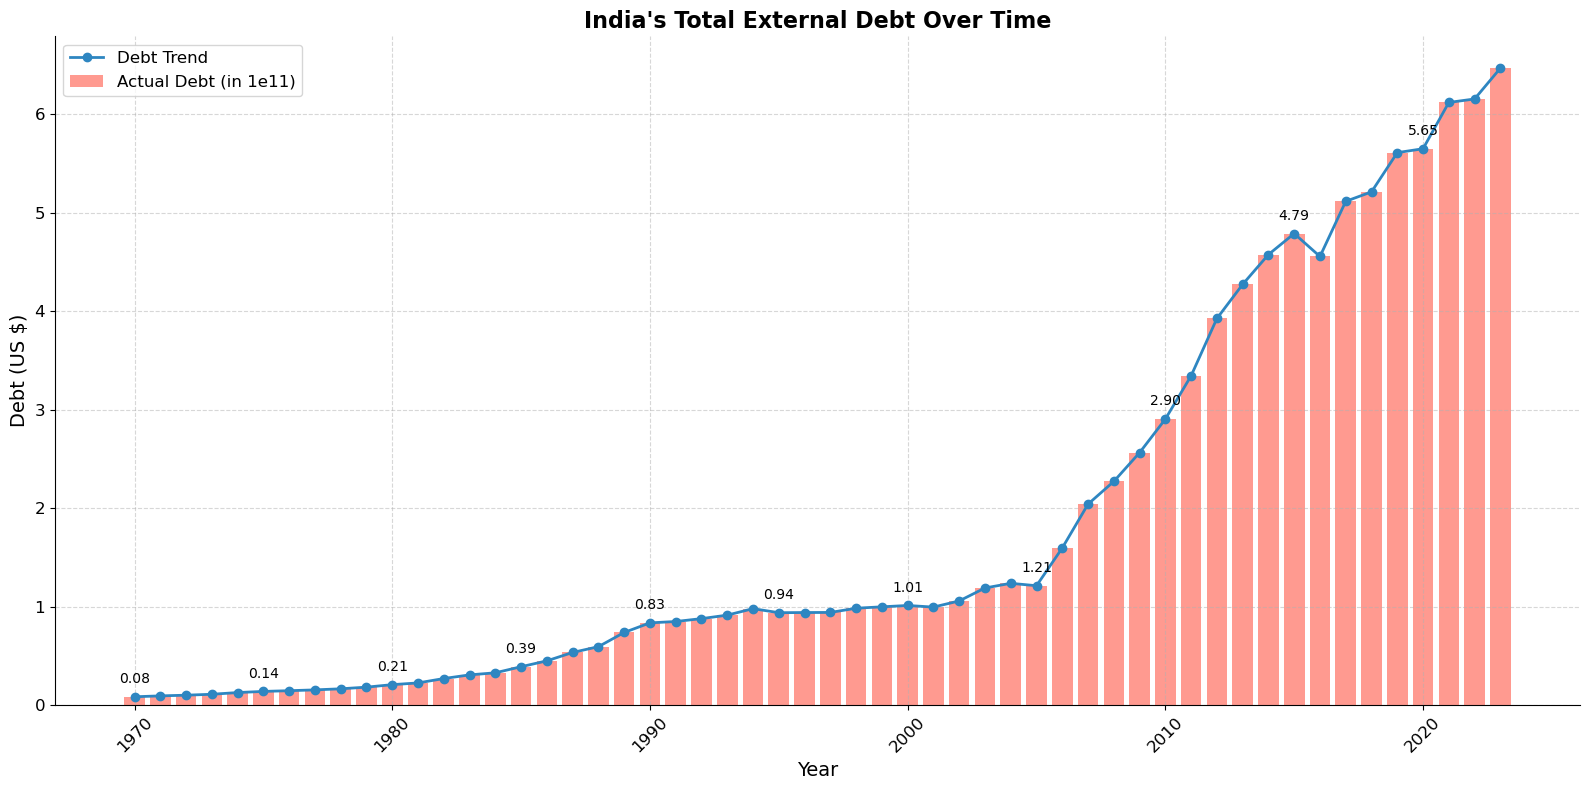

In [109]:
# 1. Total External debt over the years
plt.figure(figsize=(16, 8))

# Bar chart for actual debt values
plt.bar(final_df['year'], final_df['debt'] / 1e11, color='#FF6F61', alpha=0.7, label='Actual Debt (in 1e11)')

# Line graph for debt trend
plt.plot(final_df['year'], final_df['debt'] / 1e11, marker='o', linestyle='-', color='#2E86C1', linewidth=2, markersize=6, label='Debt Trend')

# Annotate key points on the line graph
for i, txt in enumerate(final_df['debt']):
    if i % 5 == 0:  # Show annotation every 5 years
        plt.annotate(f'{txt/1e11:.2f}', (final_df['year'].iloc[i], final_df['debt'].iloc[i] / 1e11),
                     textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='black')

# Labels and title
plt.title("India's Total External Debt Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Debt (US $)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid styling
plt.grid(True, linestyle='--', alpha=0.5)

# Remove top and right spines (borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



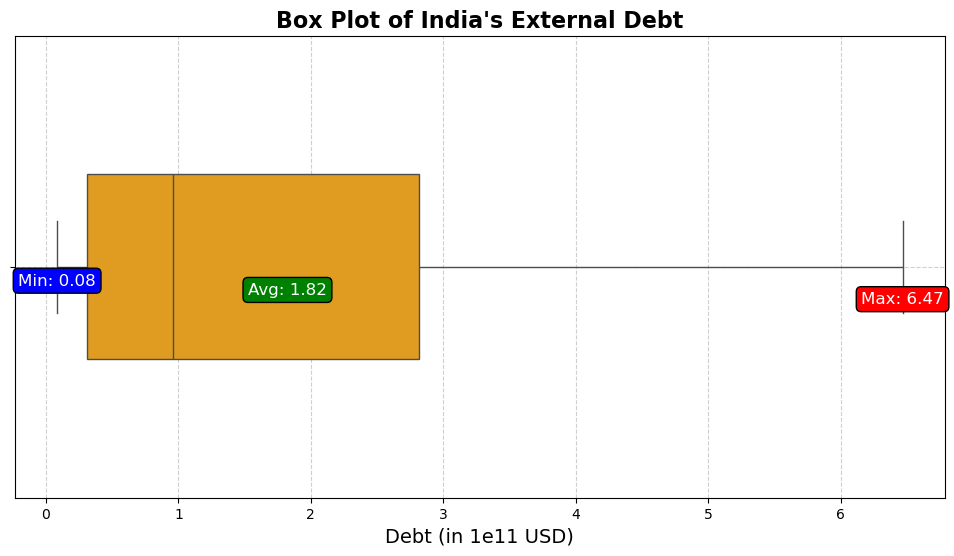

In [116]:
# 2. outliers

# Create the figure
plt.figure(figsize=(12, 6))

# Boxplot with color
sns.boxplot(x=final_df['debt'] / 1e11, color='orange', width=0.4)

# Compute key statistics
Min = final_df['debt'].min()  # Minimum Debt
Avg = final_df['debt'].mean()  # Average Debt
Max = final_df['debt'].max()  # Maximum Debt

# Add labels inside a box
def add_label(value, y_offset, label, color):
    plt.text(value / 1e11, y_offset, f'{label}: {value/1e11:.2f}', 
             ha='center', fontsize=12, color='white', 
             bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

# Add annotations for Min, Avg, and Max
add_label(Min, 0.04, 'Min', 'blue')
add_label(Avg, 0.06, 'Avg', 'green')
add_label(Max, 0.08, 'Max', 'red')

# Title and labels
plt.title("Box Plot of India's External Debt", fontsize=16, fontweight='bold')
plt.xlabel("Debt (in 1e11 USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()



0           NaN
1     10.725320
2      7.509337
3      9.339151
4     15.785598
5      9.204262
6      5.198300
7      5.678357
8      7.172340
9     10.109628
10    13.924806
11     8.476975
12    19.852184
13    13.757381
14     6.898871
15    18.834267
16    15.345212
17    18.961388
18    10.975414
19    24.342941
20    13.226149
21     1.654233
22     3.444930
23     4.049981
24     7.191804
25    -4.177435
26     0.167468
27     0.099201
28     4.544321
29     1.470363
30     1.354968
31    -1.613145
32     6.272866
33    12.429376
34     4.003767
35    -1.980685
36    31.626626
37    27.915296
38    11.297906
39    12.857314
40    13.310056
41    15.140352
42    17.397391
43     8.831163
44     7.083131
45     4.660821
46    -4.863744
47    12.300474
48     1.876551
49     7.644583
50     0.706204
51     8.320279
52     0.576622
53     5.080459
Name: debt_change, dtype: float64


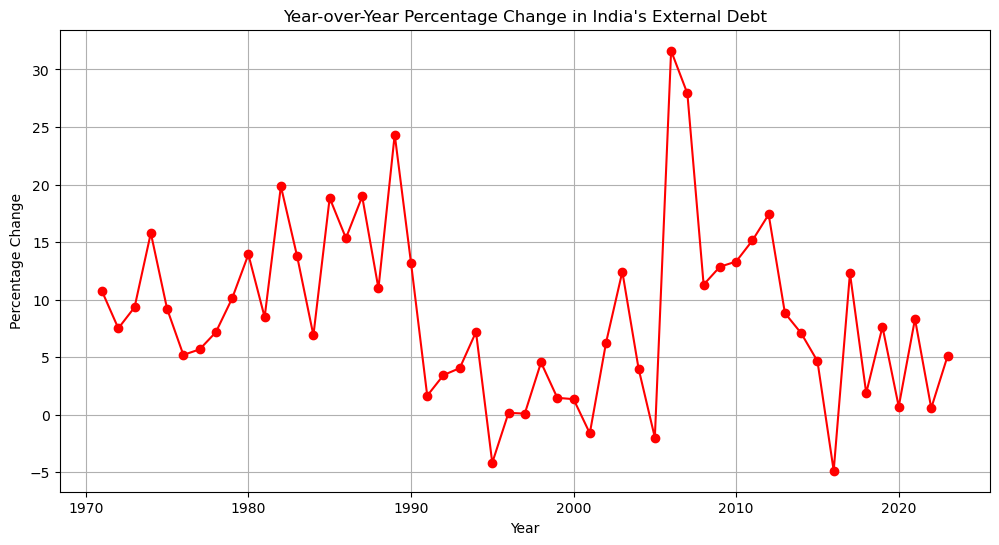

In [118]:
# year-over-year percentage change in debt
final_df['debt_change'] = final_df['debt'].pct_change() * 100
print(final_df['debt_change'])
plt.figure(figsize=(12, 6))
plt.plot(final_df['year'], final_df['debt_change'], marker='o', linestyle='-', color='red')
plt.title('Year-over-Year Percentage Change in India\'s External Debt')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()